In [1]:
# imports
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from sklearn import preprocessing
import scipy.stats as stats
from IPython.display import display # Allows the use of display() for DataFrames
import re
from matplotlib import pyplot

In [3]:
#PCA import
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
#Import models
#Decision trees
from sklearn import tree

#K-Nearest Neighbor
from sklearn import neighbors, datasets

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Import accuracy/kappa
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

In [5]:
# cross validation
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.model_selection import GridSearchCV

In [7]:
import warnings
warnings.filterwarnings('ignore') # to supress seaborn warnings

### Import data

In [8]:
#Partially preprocessed data- includes:
#Renamed PAY_0 to PAY_1; default payment next month to target
##Changed values in MARRIAGE column 0 to become 3
##Changed values in Education column 0, 5, 6 to become 4
classcredit = pd.read_csv('renumVarscredit.csv', index_col=0)

In [9]:
classcredit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,depvar
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
classcredit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,depvar
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
#Check datatypes
classcredit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
depvar       30000 non-null int64
dtypes: int64(24)
memory usage: 5.7 MB


### Check Correlation & Covariance
#### Use classcredit dataset prior to switching variables to category

<function matplotlib.pyplot.show(*args, **kw)>

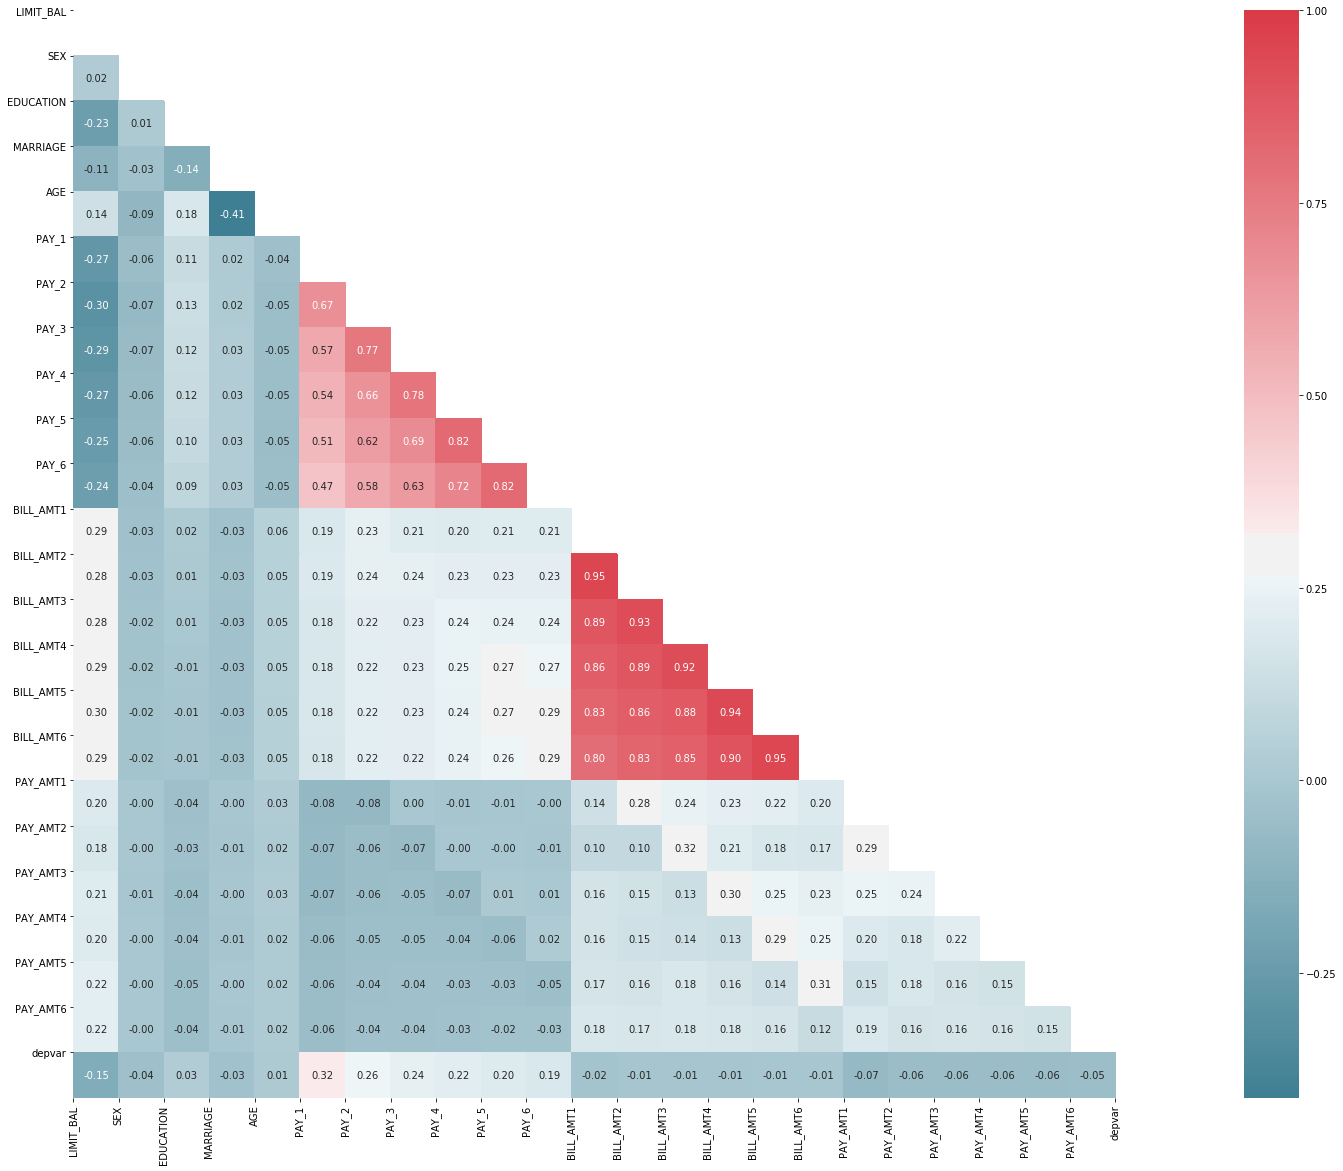

In [12]:
#Use classcredit dataset prior to switching variables to category
#Check correlations w/ output variable
#Create correlation df
corr = classcredit.corr()
#Plot figsize
plt.subplots(figsize=(30,20))
#Generate Custom diverging Color Map
cmap=sns.diverging_palette(220, 10, as_cmap=True)

#Generate a mask for upper triangle
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
#Generate Heat Map, allow annotations, & place floats in map
sns.heatmap( corr, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f" )
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show

In [13]:
classcredit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'depvar'],
      dtype='object')

In [14]:
#Check covariance with Pay Columns
rel = classcredit.iloc[:,[23, 0,5,6,7, 8, 9, 10]]
rel.cov()

,depvar,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
depvar,0.172276,-8.267552e+03,0.151499,0.130960,0.116867,0.105115,0.096020,0.089194
LIMIT_BAL,-8267.551759,1.683446e+10,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,-35093.083441
PAY_1,0.151499,-3.954593e+04,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292
PAY_2,0.130960,-4.603765e+04,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320
PAY_3,0.116867,-4.443225e+04,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815
PAY_4,0.105115,-4.057181e+04,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263
PAY_5,0.096020,-3.667056e+04,0.648743,0.844886,0.931455,1.086161,1.284114,1.064545
PAY_6,0.089194,-3.509308e+04,0.613292,0.792320,0.870815,0.963263,1.064545,1.322472


In [15]:
#Check covariance with Bill Amt Columns
rel = classcredit.iloc[:,[23, 0,11,12,13, 14, 15, 16]]
rel.cov()

,depvar,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
depvar,0.172276,-8.267552e+03,-6.003941e+02,-4.192891e+02,-4.051537e+02,-2.711999e+02,-1.705974e+02,-1.327963e+02
LIMIT_BAL,-8267.551759,1.683446e+10,2.727020e+09,2.570130e+09,2.548533e+09,2.453926e+09,2.331481e+09,2.243837e+09
BILL_AMT1,-600.394108,2.727020e+09,5.422240e+09,4.986670e+09,4.556511e+09,4.075286e+09,3.714795e+09,3.519876e+09
BILL_AMT2,-419.289137,2.570130e+09,4.986670e+09,5.065705e+09,4.582086e+09,4.086508e+09,3.720401e+09,3.524868e+09
BILL_AMT3,-405.153680,2.548533e+09,4.556511e+09,4.582086e+09,4.809338e+09,4.122238e+09,3.726780e+09,3.524247e+09
BILL_AMT4,-271.199885,2.453926e+09,4.075286e+09,4.086508e+09,4.122238e+09,4.138716e+09,3.677105e+09,3.451762e+09
BILL_AMT5,-170.597447,2.331481e+09,3.714795e+09,3.720401e+09,3.726780e+09,3.677105e+09,3.696294e+09,3.425914e+09
BILL_AMT6,-132.796294,2.243837e+09,3.519876e+09,3.524868e+09,3.524247e+09,3.451762e+09,3.425914e+09,3.546692e+09


In [16]:
#Check covariance with Pay Amt Columns
rel = classcredit.iloc[:,[23, 0,17,18,19, 20, 21, 22]]
rel.cov()

,depvar,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
depvar,0.172276,-8.267552e+03,-5.013746e+02,-5.602107e+02,-4.110763e+02,-3.695159e+02,-3.495625e+02,-3.924264e+02
LIMIT_BAL,-8267.551759,1.683446e+10,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08
PAY_AMT1,-501.374552,4.195711e+08,2.743423e+08,1.089849e+08,7.354626e+07,5.178189e+07,3.756893e+07,5.469033e+07
PAY_AMT2,-560.210740,5.333504e+08,1.089849e+08,5.308817e+08,9.929841e+07,6.501168e+07,6.368414e+07,6.456816e+07
PAY_AMT3,-411.076284,4.801180e+08,7.354626e+07,9.929841e+07,3.100051e+08,5.966970e+07,4.282921e+07,5.093879e+07
PAY_AMT4,-369.515887,4.131202e+08,5.178189e+07,6.501168e+07,5.966970e+07,2.454286e+08,3.634098e+07,4.395747e+07
PAY_AMT5,-349.562530,4.305657e+08,3.756893e+07,6.368414e+07,4.282921e+07,3.634098e+07,2.334266e+08,4.207110e+07
PAY_AMT6,-392.426415,5.065153e+08,5.469033e+07,6.456816e+07,5.093879e+07,4.395747e+07,4.207110e+07,3.160383e+08


### Pre-processing (Convert datatypes)

In [34]:
#Convert sex, marriage, education to categorical datatypes
#classcredit['SEX'] = classcredit['SEX'].astype('category')
#classcredit['MARRIAGE'] = classcredit['MARRIAGE'].astype('category')
#classcredit['EDUCATION'] = classcredit['EDUCATION'].astype('category')
#classcredit.MARRIAGE.dtype == 'category'
#classcredit.SEX.dtype == 'category'
#classcredit.EDUCATION.dtype == 'category'

True

In [35]:
#Convert pay_* columns to categories
#pattern = re.compile("^PAY_[0-9]+$")
#pay_status_columns = [ x for x in classcredit.columns if (pattern.match(x))]
#for i in pay_status_columns:
   # classcredit[i] = classcredit[i].astype('category')

In [36]:
#Convert depVar to categorical
#classcredit['depvar'] = classcredit['depvar'].astype('category')

In [37]:
#default = classcredit[classcredit['depvar']==1]
#not_default = classcredit[classcredit['depvar']==0]

In [38]:
#Confirm data type conversions
#classcredit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
depvar       30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [39]:
#classcredit.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Split Data into Train/Test Sets

In [9]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'depvar']:
  classcredit[col] = classcredit[col].astype('category')

In [10]:
# Split features(predictors) & target (depvar)
X = classcredit.drop(columns=['depvar'])
y = classcredit[['depvar']].astype('float')

In [11]:
# Split rows into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

print("Training Rows: {} \nTest Rows: {}".format(len(X_train), len(X_test)))

Training Rows: 21000 
Test Rows: 9000


### Feature Engineering (PCA & One Hot Encoding)

In [10]:
#Scale data (do this with data that has not yet had features converted to categorical)
sc = StandardScaler()  
X_trainpca = sc.fit_transform(X_train)  
X_testpca = sc.fit_transform(X_test)

/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


##### PCA

In [11]:
pca = PCA(5)  
X_trainpca = pca.fit_transform(X_trainpca)  
X_testpca = pca.transform(X_testpca) 

In [12]:
#PCA variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.28449806 0.17910761 0.06863158 0.06452892 0.04468327]


##### One Hot Encoding

In [16]:
# One-hot encoding on categorical variables
def one_hot_mixed_df(classcredit):
    data_cat = classcredit.select_dtypes(include='category')
    data_num = classcredit.select_dtypes(exclude='category')
    ## One-hot transform the objects
    data_cat_dummies = pd.get_dummies(data_cat,drop_first=True)
    ## Join dummies with numerics
    oh_data = pd.concat([data_cat_dummies, data_num], axis=1, sort=False)
    return(oh_data)

# Apply transformations
X_onehot = one_hot_mixed_df(X)

## Verify results
print('Total Columns: {}'.format(X.shape[1]))
print('Total Columns post-Dummy: {}'.format(X_onehot.shape[1]))

Total Columns: 23
Total Columns post-Dummy: 78


In [17]:
y_onehot = y
# split the rows into train and test
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(X_onehot, y_onehot,
     test_size=0.3, random_state=123)

In [18]:
# Check the first 5 rows of the data frame
X_onehot.head()

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,0,0,1,...,689,0,0,0,0,689,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,1,1,0,0,1,0,0,1,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,1,1,0,0,0,0,0,1,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,0,1,0,0,0,0,1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


#### PCA and One Hot Encoding

In [19]:
#Scale data (do this with data that has not yet had features converted to categorical)
sc = StandardScaler()  
X_trainpcaoh = sc.fit_transform(X_train_OH)  
X_testpcaoh = sc.fit_transform(X_test_OH)

/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
#PCA on OHE data
pca = PCA(15)  
X_trainpcaoh = pca.fit_transform(X_trainpcaoh)  
X_testpcaoh = pca.transform(X_testpcaoh) 

In [21]:
#PCA variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.110986   0.05827197 0.05353334 0.04913055 0.04431602 0.04045975
 0.03837027 0.03113458 0.0269891  0.0261366  0.02468903 0.02155481
 0.02002021 0.01942145 0.01843486]


## Build Models

In [12]:
# list of different classifiers we are going to test
clfs = {
#'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier()
}

### Models around dataset w/ no feature engineering

In [13]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Kappa', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Kappa': metrics.cohen_kappa_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,RandomForest,0.574240,0.329569,0.418787,0.309845,0.802000
1,DecisionTreeClassifier,0.391067,0.440452,0.414293,0.240033,0.730444
2,SVM,0.608696,0.014374,0.028084,0.018280,0.784667
3,KNeighborsClassifier,0.363152,0.175051,0.236231,0.111073,0.755000
4,GradientBoosting,0.649558,0.376797,0.476933,0.378099,0.821111


### Models using data with PCA

In [29]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score','Kappa','Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_trainpca,y_train.values.ravel())
    y_pred = clf.predict(X_testpca)
    y_score = clf.score(X_testpca,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Kappa': metrics.cohen_kappa_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,RandomForest,0.518411,0.274641,0.359060,0.246030,0.787778
1,SVM,0.606096,0.265400,0.369154,0.273362,0.803667
2,GradientBoosting,0.594340,0.291068,0.390765,0.289681,0.803556


### Models using One Hot Encoded Data

In [34]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Kappa', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train_OH,y_train_OH.values.ravel())
    y_pred = clf.predict(X_test_OH)
    y_score = clf.score(X_test_OH,y_test_OH)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test_OH, y_pred),
                     'Recall_score': metrics.recall_score(y_test_OH, y_pred),
                     'F1_score': metrics.f1_score(y_test_OH, y_pred),
                     'Kappa': metrics.cohen_kappa_score(y_test_OH, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test_OH, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,RandomForest,0.593090,0.317248,0.413378,0.309158,0.805111
1,SVM,0.607843,0.015914,0.031016,0.020194,0.784778
2,GradientBoosting,0.651226,0.368070,0.470318,0.372179,0.820556


### Models using OHE data with PCA

In [48]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Kappa', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_trainpcaoh,y_train_OH.values.ravel())
    y_pred = clf.predict(X_testpcaoh)
    y_score = clf.score(X_testpcaoh,y_test_OH)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test_OH, y_pred),
                     'Recall_score': metrics.recall_score(y_test_OH, y_pred),
                     'F1_score': metrics.f1_score(y_test_OH, y_pred),
                     'Kappa': metrics.cohen_kappa_score(y_test_OH, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test_OH, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,RandomForest,0.546820,0.317762,0.401948,0.288795,0.795333
1,SVM,0.622438,0.296201,0.401391,0.304284,0.808778
2,GradientBoosting,0.624752,0.323922,0.426640,0.327193,0.811556


##### Best performing model = Gradient Boosting followed by Random Forest on model with no feature engineering

### Parameter tuning and model fitting 

In [14]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,X_train, X_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(X_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(X_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

#Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()

def model(md, X_train, y_train, X_test, y_test):
    md.fit(X_train, y_train)
    pred = md.predict(X_test)
    prob = md.predict_proba(X_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(X_train, y_train))
    print ('Accuracy on Test set: ', md.score(X_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test)
    print ('Accuracy of predicted Y:' ,accuracy_score(y_test, pred))
    print ('Kappa of predicted Y:' ,cohen_kappa_score(y_test, pred))
    roc(prob, y_test)
    return md

#### Use Gridsearch to fine tune parameters on each model

In [18]:
#Gradient Boosting
gb = GradientBoostingClassifier(random_state=123)

In [19]:
# gridsearch on Gradient Boosting
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}
gridsearch(gb, gb_params,X_train, X_test, y_train, y_test,5)

Best params:  {'learning_rate': 0.05, 'n_estimators': 200}
Best AUC on Train set:  0.8204285714285714
Best AUC on Test set:  0.8204444444444444


 
Accuracy on Train set:  0.8765238095238095
Accuracy on Test set:  0.8168888888888889
 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7052
         1.0       0.63      0.37      0.47      1948

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      719                     1229
Not Defaulter                  419                     6633
Accuracy of predicted Y: 0.8168888888888889
Kappa of predicted Y: 0.36453400531405866


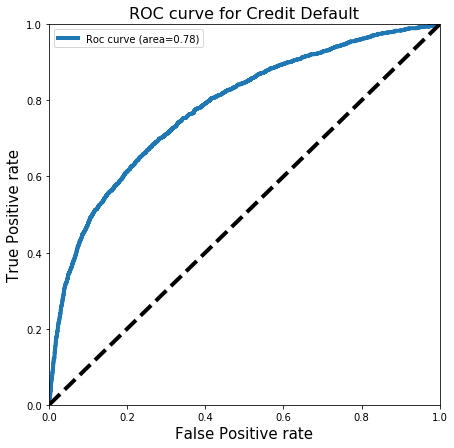

In [20]:
# feature selection with the best model from grid search
gb = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 7,n_estimators=200, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, X_train, y_train, X_test, y_test)

In [15]:
#Random Forest
rf = RandomForestClassifier(random_state=123)

In [16]:
# grid search on random forest
rf_params = {'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
gridsearch(rf, rf_params,X_train, X_test, y_train, y_test,5)

Best params:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Best AUC on Train set:  0.8196190476190476
Best AUC on Test set:  0.8212222222222222


 
Accuracy on Train set:  0.830952380952381
Accuracy on Test set:  0.82
 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      7052
         1.0       0.66      0.35      0.46      1948

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      687                     1261
Not Defaulter                  359                     6693
Accuracy of predicted Y: 0.82
Kappa of predicted Y: 0.3625054567434155


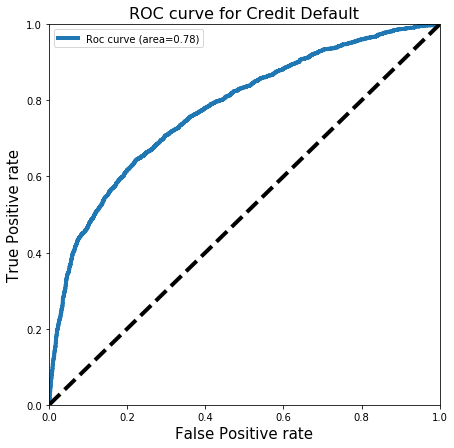

In [17]:
# feature selection with the best model from grid search
rf = RandomForestClassifier(max_depth= 7,criterion= 'gini', 
                                 n_estimators=200, max_features = 'auto',
                                 min_samples_leaf = 5)
model_rf = model(rf, X_train, y_train, X_test, y_test)

### Determine Feature Importance for Gradient Boosting Model

[0.04150582 0.00597629 0.01058013 0.00550666 0.03846408 0.3260539
 0.08790872 0.02396731 0.01210458 0.01453127 0.01716568 0.05180922
 0.03491819 0.02984454 0.02666351 0.02545966 0.03508925 0.03625361
 0.03690442 0.03841488 0.03281538 0.03315735 0.03490556]


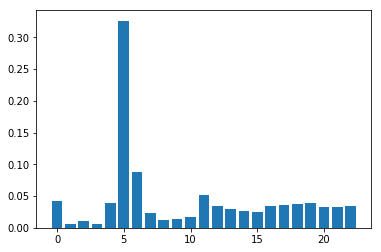

In [23]:
# feature importance
print(gb.feature_importances_)
# plot
pyplot.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
pyplot.show()

Accuracy of Model GBM on test set: 0.817
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7052
         1.0       0.63      0.36      0.46      1948

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



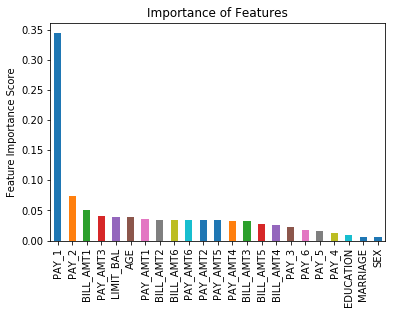

In [26]:
FinalModel = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 7,n_estimators=200, 
                                        max_features = 0.9,min_samples_leaf = 5)
FinalModel.fit(X_train,y_train.values.ravel())
predictors=list(X_train)
feat_imp = pd.Series(FinalModel.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of Model GBM on test set: {:.3f}'.format(FinalModel.score(X_test, y_test)))
pred=FinalModel.predict(X_test)
print(classification_report(y_test, pred))

#### Code below are attempts at tuning SVM models. Originally tried to do so on dataset w/out feature engineering, but it couldn't handle the categorical data. Then tried to tune using dataset with OHE and which crashed Chrome (and the kernel, I guess) twice. Then I tried to tune using the OHE with PCA dataset but that also crashed everything. Coding below is a partial representation of what I did and it's not in any real order. 

In [71]:
# gridsearch on SVM
svm = SVC()
svm_params = {'gamma': [0.001, 0.01, 0.1, 1],'C': [1, 10, 100], 'kernel':('linear', 'rbf'),
             'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
gridsearch(svm, svm_params,X_trainpcaoh, X_testpcaoh, y_train_OH, y_test_OH,5)
#'kernel':('linear', 'rbf')- add to params  'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)

KeyboardInterrupt: 

In [68]:
# feature selection with the best model from grid search
svm = SVC(C= 1, gamma= 0.0001, kernel= "linear", degree= 2, shrinking = 'True')
model_svm = model(svm, X_train, y_train, X_test, y_test)

TypeError: an integer is required

In [69]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,X_trainpcaoh, X_testpcaoh, y_train_OH, y_test_OH, kfold):
    gssvm = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gssvm.fit(X_trainpcaoh, y_train_OH)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gssvm.best_score_)
    print ('Best AUC on Test set: ', gssvm.score(X_testpcaoh, y_test_OH))

# Function to generate confusion matrix
def confmat(pred, y_test_OH):
    conmat = np.array(confusion_matrix(y_test_OH, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

    
def model(md, X_trainpcaoh, y_train_OH, X_testpcaoh, y_test_OH):
    md.fit(X_trainpcaoh, y_train_OH)
    pred = md.predict(X_testpcaoh)
    prob = md.predict_proba(X_testpcaoh)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(X_trainpcaoh, y_train_OH))
    print ('Accuracy on Test set: ', md.score(X_testpcaoh, y_test_OH))
    print (' ')
    print(classification_report(y_test_OH, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test_OH)
    
    return md